# Example of how to read and parse the data file save from the rogue software

In [9]:
# Setup the library
import pyrogue.utilities.fileio as fileio
import numpy as np
import matplotlib.pyplot as plt
import os
top_level=f'{os.getcwd()}/..'

# Waveforms variables to be filled
adcLive = { i : []  for i in range(4) }
ampLive = { i : []  for i in range(4) }  
adcFault = { i : []  for i in range(4) }
ampFault = { i : []  for i in range(4) }  

# Open the .dat file
with fileio.FileReader(files=f'{top_level}/data/example_dataset.dat') as fd:
    
    # Loop through the file data
    for header,data in fd.records():

        # Convert the numpy array to 16-bit values
        rawData = data[16:].view(np.int16)
        
        # Check for error in frame
        if (header.error>0):
            # Look at record header data
            print(f"Processing record. Total={fd.totCount}, Current={fd.currCount}")
            print(f"Record size    = {header.size}")
            print(f"Record channel = {header.channel}")
            print(f"Record flags   = {header.flags:#x}")
            print(f"Record error   = {header.error:#x}")

        # Check if ADC Live waveform
        elif header.channel < 4:
            adcLive[header.channel-0].append(rawData)

        # Check if AMP Live waveform
        elif header.channel < 8:
            ampLive[header.channel-4].append(rawData)        

        # Check if ADC Live waveform
        elif header.channel < 12:
            adcFault[header.channel-8].append(rawData)

        # Check if AMP Live waveform
        elif header.channel < 16:
            ampFault[header.channel-12].append(rawData)  
        
        # Else undefined stream index
        else:
            print('UNDEFINED DATA STREAM!!!')

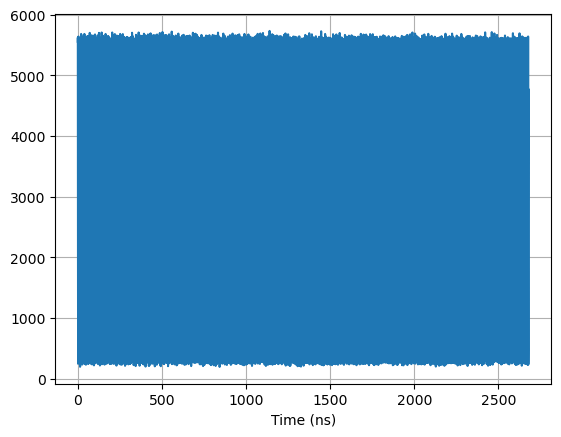

In [14]:
# Plot a waveform from AMP[3]
size = len(ampLive[3][1])
timeBin = 1.0/(0.509*6.0) # Unit of ns for 3.054 GSPS
timeSteps = np.linspace(0, timeBin*(size-1), num=size)

# Plot the Waveform Full Scale
plt.plot(timeSteps,ampLive[3][1])
plt.xlabel("Time (ns)")
plt.grid()

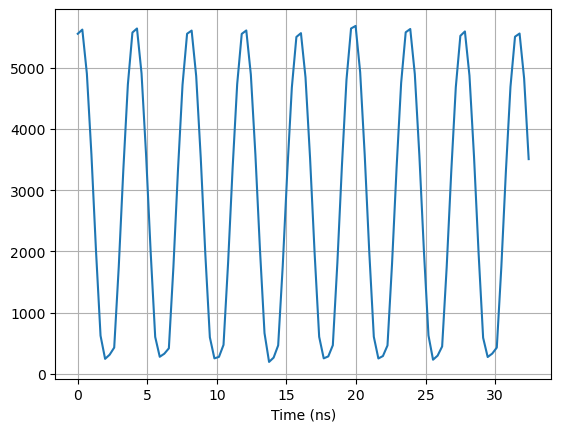

In [13]:
# Plot the Waveform Full Scale
plt.plot(timeSteps[0:100],ampLive[3][1][0:100])
plt.xlabel("Time (ns)")
plt.grid()